In [1]:
import requests
import pandas as pd
from datetime import datetime
import os
import gzip
import shutil
import pandas as pd
from sklearn.impute import KNNImputer
from datetime import datetime
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, trim
import requests
import pandas as pd
from datetime import datetime
from pyspark.sql.functions import col, count, when, isnan
from datetime import timedelta
from pyspark.sql import Window
from pyspark.sql.functions import last

In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
import pandas as pd
from datetime import datetime

# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP historical data endpoint
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock_symbol}?from=2005-02-01&to={datetime.now().strftime("%Y-%m-%d")}&apikey={api_key}'

# FMP API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Extract the historical data
    if 'historical' in data:
        historical_data = data['historical']

        # Convert to a pandas DataFrame
        index_df = pd.DataFrame(historical_data)

        # Filter the DataFrame to only include the 'Close' column
        index_df = index_df[['date', 'close']]

        # Display the DataFrame
        print(index_df)
    else:
        print("No 'historical' data found in the response.")
else:
    print(f'Failed to retrieve data: {response.status_code}')

            date        close
0     2024-01-12  4480.020020
1     2024-01-11  4442.279790
2     2024-01-10  4468.979980
3     2024-01-09  4467.169920
4     2024-01-08  4485.479980
...          ...          ...
4786  2005-02-07  3051.969971
4787  2005-02-04  3037.139893
4788  2005-02-03  3010.389893
4789  2005-02-02  3022.340088
4790  2005-02-01  3008.850098

[4791 rows x 2 columns]


## Technical Indicators

In [4]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP SMA technical indicator endpoint with daily data
sma_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={sma_period}&type=sma&apikey={api_key}'

# FMP API request for SMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    sma_data = response.json()

    # Convert to a pandas DataFrame
    sma_df = pd.DataFrame(sma_data)

    # Ensure 'date' column is in datetime format
    sma_df['date'] = pd.to_datetime(sma_df['date'])

    # Format the 'date' column to display dates only
    sma_df['date'] = sma_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    sma_df = sma_df[sma_df['date'] >= '2005-02-01']

    # Keep only the 'date' and 'sma' columns
    sma_df = sma_df[['date', 'sma']]

    # Display the DataFrame
    print(sma_df)
else:
    print(f'Failed to retrieve SMA data: {response.status_code}')

            date          sma
0     2024-01-12  4399.130781
1     2024-01-11  4390.752783
2     2024-01-10  4382.473589
3     2024-01-09  4373.381192
4     2024-01-08  4365.025791
...          ...          ...
4786  2005-02-07  2946.856992
4787  2005-02-04  2943.796592
4788  2005-02-03  2941.137192
4789  2005-02-02  2938.466196
4790  2005-02-01  2935.556992

[4791 rows x 2 columns]


In [5]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP EMA technical indicator endpoint with daily data
ema_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={ema_period}&type=ema&apikey={api_key}'

# FMP API request for EMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    ema_data = response.json()

    # Convert to a pandas DataFrame
    ema_df = pd.DataFrame(ema_data)

    # Ensure 'date' column is in datetime format
    ema_df['date'] = pd.to_datetime(ema_df['date'])

    # Format the 'date' column to display dates only
    ema_df['date'] = ema_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    ema_df = ema_df[ema_df['date'] >= '2005-02-01']

    # Keep only the 'date' and 'ema' columns
    ema_df = ema_df[['date', 'ema']]

    # Display the DataFrame
    print(ema_df)
else:
    print(f'Failed to retrieve EMA data: {response.status_code}')


            date          ema
0     2024-01-12  4411.631541
1     2024-01-11  4408.840175
2     2024-01-10  4407.475293
3     2024-01-09  4404.964897
4     2024-01-08  4402.425917
...          ...          ...
4786  2005-02-07  2945.823310
4787  2005-02-04  2941.490794
4788  2005-02-03  2937.586749
4789  2005-02-02  2934.615192
4790  2005-02-01  2931.034584

[4791 rows x 2 columns]


# Index + Technical Indicator 

In [6]:
# Merge index_df and sma_df on 'date'
merged_df = pd.merge(index_df, sma_df, on='date', how='left')

# Merge the result with ema_df on 'date'
index_data = pd.merge(merged_df, ema_df, on='date', how='left')

# Rename the columns appropriately
index_data.columns = ['Date', 'Close', 'SMA', 'EMA']

# Display the DataFrame
print(index_data)

            Date        Close          SMA          EMA
0     2024-01-12  4480.020020  4399.130781  4411.631541
1     2024-01-11  4442.279790  4390.752783  4408.840175
2     2024-01-10  4468.979980  4382.473589  4407.475293
3     2024-01-09  4467.169920  4373.381192  4404.964897
4     2024-01-08  4485.479980  4365.025791  4402.425917
...          ...          ...          ...          ...
4786  2005-02-07  3051.969971  2946.856992  2945.823310
4787  2005-02-04  3037.139893  2943.796592  2941.490794
4788  2005-02-03  3010.389893  2941.137192  2937.586749
4789  2005-02-02  3022.340088  2938.466196  2934.615192
4790  2005-02-01  3008.850098  2935.556992  2931.034584

[4791 rows x 4 columns]


In [7]:
index_data.describe()

,Close,SMA,EMA
count,4791.000000,4791.000000,4791.000000
mean,3319.823072,3312.066820,3312.235420
std,588.948901,573.080655,568.929300
min,1809.979981,2091.644585,2112.804279
25%,2902.965088,2907.224209,2915.686605
50%,3320.149902,3307.956616,3305.151828
75%,3703.500000,3678.061900,3669.794292
max,4557.569824,4478.329834,4460.090783


# Interest Rate API (Eurostat)

In [8]:
# Dataset code
dataset_code = "ei_mfir_m"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [9]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'ei_mfir_m.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 's_adj', 'p_adj', 'indic', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['indic'] == 'MF-3MI-RT')
]

# Drop unnecessary columns
structured_data.drop(['freq', 's_adj', 'p_adj'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-02-01 ']
structured_data = structured_data[['indic','geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [10]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
structured_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Interest')

# Filter for 'geo' == 'EA'
Interest_data_ea = structured_data[structured_data['geo'] == 'EA']

# Apply forward filling
Interest_data_ea.loc[:, 'Interest'] = Interest_data_ea['Interest'].ffill()

# Rearrange the columns
Interest_data_ea = Interest_data_ea[['Period', 'geo', 'Interest']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(Interest_data_ea.head(10))


       Period geo  Interest
3    2005-06   EA  2.11100 
16   2005-07   EA  2.11940 
29   2005-08   EA  2.13250 
42   2005-09   EA  2.13910 
55   2005-10   EA  2.19660 
68   2005-11   EA  2.36090 
81   2005-12   EA  2.47290 
94   2006-01   EA  2.51170 
107  2006-02   EA  2.60040 
120  2006-03   EA  2.72260 


In [11]:
# Convert 'Period' to datetime
Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])

# Set 'Period' as the index
Interest_data_ea.set_index('Period', inplace=True)

# Create a daily date range that covers the entire period in your data
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex the DataFrame to this date range, forward filling the missing values
daily_interest_data = Interest_data_ea.reindex(all_days).ffill()

# Reset the index so 'Period' becomes a column again
daily_interest_data.reset_index(inplace=True)
daily_interest_data.rename(columns={'index': 'Period'}, inplace=True)

# Display the first 10 rows of the daily data
print(daily_interest_data.head(10))

      Period geo  Interest
0 2005-06-01  EA  2.11100 
1 2005-06-02  EA  2.11100 
2 2005-06-03  EA  2.11100 
3 2005-06-04  EA  2.11100 
4 2005-06-05  EA  2.11100 
5 2005-06-06  EA  2.11100 
6 2005-06-07  EA  2.11100 
7 2005-06-08  EA  2.11100 
8 2005-06-09  EA  2.11100 
9 2005-06-10  EA  2.11100 


In [12]:
# Check if 'Period' is in the columns; if not, the index might already be the 'Period'
if 'Period' in Interest_data_ea.columns:
    Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])
    Interest_data_ea.set_index('Period', inplace=True)
elif not isinstance(Interest_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    Interest_data_ea.index = pd.to_datetime(Interest_data_ea.index)

# Create a daily date range
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex to create a DataFrame with all days, introducing NaNs for days without data
interest_data = Interest_data_ea.reindex(all_days)

# Convert the index to a numerical value for KNN
interest_data['Day_Ordinal'] = interest_data.index.map(datetime.toordinal)

# Extract the 'Interest' column for imputation
knn_data = interest_data[['Day_Ordinal', 'Interest']].values

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Put the imputed 'Interest' data back into the DataFrame
interest_data['Interest'] = knn_data_imputed[:, 1]

# Drop the 'Day_Ordinal' column as it's no longer needed
interest_data.drop('Day_Ordinal', axis=1, inplace=True)

# Reset index to make 'Period' a column again
interest_data.reset_index(inplace=True)
interest_data.rename(columns={'index': 'Period'}, inplace=True)

# If the 'geo' column is required, fill it with a constant value (e.g., 'EA')
interest_data['geo'] = 'EA'

# Display the first 10 rows of the daily data
print(interest_data.head(10))

      Period geo  Interest
0 2005-06-01  EA   2.11100
1 2005-06-02  EA   2.13972
2 2005-06-03  EA   2.13972
3 2005-06-04  EA   2.13972
4 2005-06-05  EA   2.13972
5 2005-06-06  EA   2.13972
6 2005-06-07  EA   2.13972
7 2005-06-08  EA   2.13972
8 2005-06-09  EA   2.13972
9 2005-06-10  EA   2.13972


# Bonds Yields API (Eurostat)

In [13]:
# Dataset code
dataset_code = "irt_euryld_d"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [14]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'irt_euryld_d.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'yld_curv', 'maturity', 'bonds', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['yld_curv'] == 'SPOT_RT') & 
    (structured_data['bonds'] == 'CGB_EA')
]

# Drop unnecessary columns
structured_data.drop(['freq', 'geo'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2004-10-01 ']
structured_data = structured_data[['yld_curv', 'maturity', 'bonds'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [15]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[3:]  # Assuming date columns start from the 4th column
data_for_melting = structured_data[['maturity'] + list(date_columns)]

# Melt the DataFrame to change its structure
bonds_data = pd.melt(data_for_melting, id_vars=['maturity'], var_name='Period', value_name='Rate')

# Specify the desired maturities (M1 to M12 and Y1 to Y30)
desired_maturities = [f'M{i}' for i in range(1, 3)] + [f'Y{i}' for i in range(1, 10)]

# Filter the DataFrame to include only the specified maturities
bonds_data = bonds_data[bonds_data['maturity'].isin(desired_maturities)]

# Rearrange the columns
bonds_data = bonds_data[['Period', 'maturity', 'Rate']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(bonds_data.head())


          Period maturity     Rate
9    2004-10-01        Y1  2.27378
141  2004-10-01        Y2  2.58136
273  2004-10-01        Y3  2.86602
286  2004-10-01        Y4  3.12325
298  2004-10-01        Y5  3.35223


# Inflation Rate API (Eurostat)

In [16]:
# Dataset code
dataset_code = "prc_hicp_manr"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [17]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'prc_hicp_manr.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'unit', 'coicop', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['unit'] == 'RCH_A') & 
    (structured_data['coicop'] == 'CP00')
]

# Drop unnecessary columns
structured_data.drop(['freq'], axis=1, inplace=True)

# Filter for date range (from January 1, 2005, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-02-01 ']
structured_data = structured_data[['unit', 'coicop', 'geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [18]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  # Assuming date columns start from the 6th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
inflation_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Inflation')

# Filter for 'geo' == 'EA'
inflation_data_ea = inflation_data[inflation_data['geo'] == 'EA']

# Apply forward filling
inflation_data_ea.loc[:, 'Inflation'] = inflation_data_ea['Inflation'].ffill()

# Rearrange the columns
inflation_data_ea = inflation_data_ea[['Period', 'geo', 'Inflation']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(inflation_data_ea.head(10))

       Period geo Inflation
9    2005-05   EA      2.0 
54   2005-06   EA      2.0 
99   2005-07   EA      2.1 
144  2005-08   EA      2.2 
189  2005-09   EA      2.6 
234  2005-10   EA      2.5 
279  2005-11   EA      2.3 
324  2005-12   EA      2.3 
369  2006-01   EA      2.4 
414  2006-02   EA      2.4 


In [19]:
# Convert 'Period' to datetime
inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])

# Set 'Period' as the DataFrame index
inflation_data_ea.set_index('Period', inplace=True)

# Resample to daily data using forward fill
daily_data_ffill = inflation_data_ea.resample('D').ffill()

# Reset index to move 'Period' back to a column
daily_data_ffill.reset_index(inplace=True)

# Display the first 10 rows of the daily data
print(daily_data_ffill.head(10))

      Period geo Inflation
0 2005-05-01  EA      2.0 
1 2005-05-02  EA      2.0 
2 2005-05-03  EA      2.0 
3 2005-05-04  EA      2.0 
4 2005-05-05  EA      2.0 
5 2005-05-06  EA      2.0 
6 2005-05-07  EA      2.0 
7 2005-05-08  EA      2.0 
8 2005-05-09  EA      2.0 
9 2005-05-10  EA      2.0 


In [20]:
# Check if 'Period' is in the columns; if not, the index should already be the 'Period'
if 'Period' in inflation_data_ea.columns:
    inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])
    inflation_data_ea.set_index('Period', inplace=True)
elif not isinstance(inflation_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    inflation_data_ea.index = pd.to_datetime(inflation_data_ea.index)

# Convert non-numeric values to NaN in the 'Inflation' column
inflation_data_ea['Inflation'] = pd.to_numeric(inflation_data_ea['Inflation'], errors='coerce')

# Create a daily date range that covers the entire period of your data
date_range = pd.date_range(start=inflation_data_ea.index.min(), end=inflation_data_ea.index.max(), freq='D')

# Create a new DataFrame for KNN imputation
inflation_data = pd.DataFrame(date_range, columns=['Period'])

# Merge with your existing data - this will introduce NaNs for days without data
inflation_data = inflation_data.merge(inflation_data_ea, how='left', left_on='Period', right_index=True)

# Convert 'Period' to a numerical value (e.g., days since start)
min_date = inflation_data['Period'].min()
inflation_data['Day_Ordinal'] = (inflation_data['Period'] - min_date).dt.days

# Prepare data for KNN imputation
knn_data = inflation_data[['Day_Ordinal', 'Inflation']]

# Initialize KNN Imputer - 5 neighbors / Week
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Add imputed data back to DataFrame
inflation_data['Inflation'] = knn_data_imputed[:, 1]

# Fill 'geo' column with 'EA'
inflation_data['geo'] = 'EA'

# Convert 'Day_Ordinal' back to datetime
inflation_data['Period'] = inflation_data['Day_Ordinal'].apply(lambda x: min_date + timedelta(days=x))

# Drop the 'Day_Ordinal' column
inflation_data.drop(columns='Day_Ordinal', inplace=True)

# Display the first 10 rows of the daily data
print(inflation_data.head(10))

      Period geo  Inflation
0 2005-05-01  EA       2.00
1 2005-05-02  EA       2.18
2 2005-05-03  EA       2.18
3 2005-05-04  EA       2.18
4 2005-05-05  EA       2.18
5 2005-05-06  EA       2.18
6 2005-05-07  EA       2.18
7 2005-05-08  EA       2.18
8 2005-05-09  EA       2.18
9 2005-05-10  EA       2.18


# SparkSQL: Tables Connection

In [23]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("Stock Market Trends Analysis") \
    .getOrCreate()

# Function to format date columns in Pandas DataFrame
def format_date_columns(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column]).dt.date
    return df

# Format date columns
index_data = format_date_columns(index_data, 'Date')
interest_data = format_date_columns(interest_data, 'Period')
bonds_data = format_date_columns(bonds_data, 'Period')
inflation_data = format_date_columns(inflation_data, 'Period')

# Convert the Pandas DataFrames to Spark DataFrames
index_df = spark.createDataFrame(index_data)
interest_df = spark.createDataFrame(interest_data)
bonds_df = spark.createDataFrame(bonds_data)
inflation_df = spark.createDataFrame(inflation_data)

# Trim and convert date columns to DateType
index_df = index_df.withColumn("date", to_date(trim(col("date")), "yyyy-MM-dd"))
interest_df = interest_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
bonds_df = bonds_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
inflation_df = inflation_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))

# Create Temporary Views
index_df.createOrReplaceTempView("indexView")
interest_df.createOrReplaceTempView("interestView")
bonds_df.createOrReplaceTempView("bondsView")
inflation_df.createOrReplaceTempView("inflationView")

# SQL Query for Joining
join_query = """
SELECT i.Date, i.Close, i.SMA, i.EMA,
       int.Interest as InterestRate, 
       b.Rate as BondRate, b.maturity as BondMaturity, 
       inf.Inflation as InflationRate
FROM indexView i
LEFT JOIN interestView int ON i.date = int.Period
LEFT JOIN bondsView b ON i.date = b.Period
LEFT JOIN inflationView inf ON i.date = inf.Period
"""

# Execute the query
dataset = spark.sql(join_query)

# Show the result
dataset.show(10)

+----------+------------+------------------+------------------+------------+--------+------------+-------------+
|      Date|       Close|               SMA|               EMA|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+------------+------------------+------------------+------------+--------+------------+-------------+
|2011-10-24|2369.0700684|2202.3973950220006|2281.6404591131504|     1.44908|  4.2126|          Y9|          2.9|
|2011-10-24|2369.0700684|2202.3973950220006|2281.6404591131504|     1.44908| 4.03609|          Y8|          2.9|
|2011-10-24|2369.0700684|2202.3973950220006|2281.6404591131504|     1.44908| 3.82462|          Y7|          2.9|
|2011-10-24|2369.0700684|2202.3973950220006|2281.6404591131504|     1.44908| 3.57604|          Y6|          2.9|
|2011-10-24|2369.0700684|2202.3973950220006|2281.6404591131504|     1.44908| 3.29719|          Y5|          2.9|
|2011-10-24|2369.0700684|2202.3973950220006|2281.6404591131504|     1.44908| 3.01348|          Y

In [24]:
# DataFrame: joined_df
numeric_column_types = ['int', 'double', 'float', 'long']

# Counting zeros and nulls for each column
for column in dataset.columns:
    # Check if the column is numeric
    if str(dataset.schema[column].dataType) in numeric_column_types:
        zero_count = dataset.filter(col(column) == 0).count()
        null_or_nan_count = joined_df.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        zero_count = 'N/A' # Not applicable for non-numeric columns
        null_or_nan_count = dataset.filter(col(column).isNull()).count() # Check only for nulls in non-numeric columns

    print(f"Column '{column}': Zeros = {zero_count}, Nulls or NaNs = {null_or_nan_count}")

Column 'Date': Zeros = N/A, Nulls or NaNs = 0
Column 'Close': Zeros = N/A, Nulls or NaNs = 0
Column 'SMA': Zeros = N/A, Nulls or NaNs = 0
Column 'EMA': Zeros = N/A, Nulls or NaNs = 0
Column 'InterestRate': Zeros = N/A, Nulls or NaNs = 975


Column 'BondRate': Zeros = N/A, Nulls or NaNs = 16


Column 'BondMaturity': Zeros = N/A, Nulls or NaNs = 16
Column 'InflationRate': Zeros = N/A, Nulls or NaNs = 777


In [25]:
# Print the schema of the DataFrame
dataset.printSchema()

# Count the number of rows in the DataFrame
print("Number of rows:", dataset.count())

# Show statistical summaries of the DataFrame
dataset.describe().show()

root
 |-- Date: date (nullable = true)
 |-- Close: double (nullable = true)
 |-- SMA: double (nullable = true)
 |-- EMA: double (nullable = true)
 |-- InterestRate: double (nullable = true)
 |-- BondRate: string (nullable = true)
 |-- BondMaturity: string (nullable = true)
 |-- InflationRate: double (nullable = true)

Number of rows: 42991


24/01/14 12:10:40 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+------------------+------------------+------------------+------------------+------------+------------------+
|summary|            Close|               SMA|               EMA|      InterestRate|          BondRate|BondMaturity|     InflationRate|
+-------+-----------------+------------------+------------------+------------------+------------------+------------+------------------+
|  count|            42991|             42991|             42991|             42016|             42975|       42975|             42214|
|   mean|3317.968335401602|3310.3458328620545| 3310.476036716014|1.0332473686214005|1.7454279187899828|        NULL|2.1377855687687473|
| stddev|588.2984599435092| 572.5924254026563| 568.4025384531909| 1.655530792323179|1.5986449079019565|        NULL| 2.079979486913024|
|    min|     1809.9799805|2091.6445849719994|2112.8042786456626|            -0.582|          -0.00122|          Y1|              -0.6|
|    max|     4557.5698242|    4478.329833978|44

In [26]:
# Count the total number of rows
total_rows = dataset.count()

# Count rows where specific columns are available but others are missing (Null or NaN)
# Adjust column names as per your DataFrame
missing_columns_count = dataset.filter(
    (col("InterestRate").isNull() | isnan(col("InterestRate"))) &
    (col("BondRate").isNull() | isnan(col("BondRate"))) &
    (col("InflationRate").isNull() | isnan(col("InflationRate"))) &
    col("Close").isNotNull()
).count()

# Calculate the percentage of such instances
percentage_missing_columns = (missing_columns_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing 'InterestRate', 'BondRate', and 'InflationRate': {missing_columns_count}")
print(f"Percentage of Rows with missing rates: {percentage_missing_columns:.2f}%")

# Filter the DataFrame to get rows with missing 'InterestRate', 'BondRate', and 'InflationRate' but available 'Open'
missing_values_table = dataset.filter(
    (col("InterestRate").isNull() | isnan(col("InterestRate"))) &
    (col("BondRate").isNull() | isnan(col("BondRate"))) &
    (col("InflationRate").isNull() | isnan(col("InflationRate"))) &
    col("Close").isNotNull()
)

# Show the rows with missing values
missing_values_table.show()


Total Rows: 42991
Rows with 'Open' but missing 'InterestRate', 'BondRate', and 'InflationRate': 3
Percentage of Rows with missing rates: 0.01%


+----------+----------+-----------------+-----------------+------------+--------+------------+-------------+
|      Date|     Close|              SMA|              EMA|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+----------+-----------------+-----------------+------------+--------+------------+-------------+
|2023-12-29| 4521.6499|4323.256606600001|4386.024278247527|        NULL|    NULL|        NULL|         NULL|
|2023-12-22|4521.47021|4300.129204200001|4368.764145296709|        NULL|    NULL|        NULL|         NULL|
|2024-01-12|4480.02002|     4399.1307814|4411.631541427969|        NULL|    NULL|        NULL|         NULL|
+----------+----------+-----------------+-----------------+------------+--------+------------+-------------+



In [27]:
# Count the total number of rows
total_rows = dataset.count()

# Count rows where any one of the specific columns is available but others are missing (Null or NaN)
# Adjust column names as per your DataFrame
missing_any_column_count = dataset.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

# Filter the DataFrame to get rows with missing any one of 'InterestRate', 'BondRate', and 'InflationRate' but available 'Open'
missing_any_values_table = dataset.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
)

# Show the rows with missing values
missing_any_values_table.show()


Total Rows: 42991
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 988
Percentage of Rows with missing any one rate: 2.30%
+----------+------------+------------------+-----------------+------------+--------+------------+-------------+
|      Date|       Close|               SMA|              EMA|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+------------+------------------+-----------------+------------+--------+------------+-------------+
|2022-06-22|3464.6398926|3698.1979984339996| 3690.26808494779|     0.16346|    NULL|        NULL|         8.92|
|2024-01-11|  4442.27979| 4390.752783400001|4408.840174955641|        NULL| 2.86198|          Y9|         NULL|
|2024-01-11|  4442.27979| 4390.752783400001|4408.840174955641|        NULL| 2.79284|          Y8|         NULL|
|2024-01-11|  4442.27979| 4390.752783400001|4408.840174955641|        NULL| 2.72034|          Y7|         NULL|
|2024-01-11|  4442.27979| 4390.752783400001|4408.84017

## Window Approuch

In [28]:
from pyspark.sql import Window
from pyspark.sql.functions import last

# Define the window specification for forward fill with partitioning by 'date'
window_spec = Window.partitionBy("Date").orderBy("Date").rowsBetween(Window.unboundedPreceding, Window.currentRow)

# Apply forward fill for each column that needs imputation
dataset_ff = dataset.withColumn("InterestRate", last("InterestRate", ignorenulls=True).over(window_spec)) \
                    .withColumn("BondRate", last("BondRate", ignorenulls=True).over(window_spec)) \
                    .withColumn("InflationRate", last("InflationRate", ignorenulls=True).over(window_spec))

# Show the result
dataset_ff.show()

+----------+-----------+------------------+------------------+------------+--------+------------+-------------+
|      Date|      Close|               SMA|               EMA|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+-----------+------------------+------------------+------------+--------+------------+-------------+
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|        NULL| 3.48231|          Y9|         NULL|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|        NULL| 3.37388|          Y8|         NULL|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|        NULL| 3.25104|          Y7|         NULL|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|        NULL| 3.11258|          Y6|         NULL|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|        NULL| 2.95754|          Y5|         NULL|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|        NULL| 2.78549|          Y4|       

In [29]:
from pyspark.sql.functions import col, isnan, count

# Count the total number of rows
total_rows = dataset_ff.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 42991
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 988
Percentage of Rows with missing any one rate: 2.30%


Here's why the Window function is used:

    Row-wise Calculations: PySpark's Window function allows you to specify a range of rows (a window) relative to the current row and perform calculations across these rows.

    Emulating ffill: By ordering the rows in the window based on the 'date' column and then using the last function (which returns the last non-null value in the window), we effectively emulate the forward fill behavior. It picks the last non-null value encountered in the ordered window and applies it to the current row if the current value is null.

    Scalability and Performance: PySpark is designed for big data processing. While Pandas' ffill is straightforward and efficient for in-memory data on a single machine, PySpark's window functions are designed to work efficiently on distributed datasets across multiple nodes in a cluster.

    Lack of Direct ffill Equivalent: PySpark DataFrame API does not have a direct method like ffill in Pandas. Therefore, the combination of Window and last functions is a common approach to achieve similar functionality.

### Because of the Nature of the Fields (Interest Rate and Inflation Rate), is possible to use the MEAN to fill the Missing Day Value

In [30]:
from pyspark.sql.functions import mean

# Define the numeric columns
numeric_cols = ["InterestRate", "BondRate", "InflationRate"]

# Calculate the mean of non-null values for each column
mean_values = dataset_ff.select([mean(c).alias(c) for c in numeric_cols]).collect()[0].asDict()

# Fill null values with the mean
for col in numeric_cols:
    dataset_ff = dataset_ff.na.fill({col: mean_values[col]})

# Show the result
dataset_ff.show()

+----------+-----------+------------------+------------------+----------------+--------+------------+-----------------+
|      Date|      Close|               SMA|               EMA|    InterestRate|BondRate|BondMaturity|    InflationRate|
+----------+-----------+------------------+------------------+----------------+--------+------------+-----------------+
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|1.03324736862135| 3.48231|          Y9|2.137785568768732|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|1.03324736862135| 3.37388|          Y8|2.137785568768732|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|1.03324736862135| 3.25104|          Y7|2.137785568768732|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|1.03324736862135| 3.11258|          Y6|2.137785568768732|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|1.03324736862135| 2.95754|          Y5|2.137785568768732|
|2005-02-01|3008.850098|2935.55699221999

In [31]:
from pyspark.sql.functions import col, isnan, count

# Count the total number of rows
total_rows = dataset_ff.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 42991
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 0
Percentage of Rows with missing any one rate: 0.00%


## KNN Approuch

In [34]:
# Convert Spark DataFrame to Pandas DataFrame
dataset_pd = dataset.toPandas()

# Replace non-numeric values to NaN
numeric_cols = ["InterestRate", "BondRate", "InflationRate"]
dataset_pd[numeric_cols] = dataset_pd[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
dataset_pd[numeric_cols] = knn_imputer.fit_transform(dataset_pd[numeric_cols])

# Convert back to Spark DataFrame
dataset_knn = spark.createDataFrame(dataset_pd)


In [35]:
# Sort the DataFrame in ascending order by the 'date' column
dataset_knn = dataset_knn.orderBy("Date")

# Show the result
dataset_knn.show()


+----------+-----------+------------------+------------------+------------------+--------+------------+------------------+
|      Date|      Close|               SMA|               EMA|      InterestRate|BondRate|BondMaturity|     InflationRate|
+----------+-----------+------------------+------------------+------------------+--------+------------+------------------+
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|            0.7454| 2.59681|          Y3|             5.036|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|1.9096960000000003| 3.11258|          Y6|2.8160000000000003|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|0.7373880000000002| 2.78549|          Y4|1.6800000000000002|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|          1.909272| 2.95754|          Y5|3.8880000000000003|
|2005-02-01|3008.850098|2935.5569922199998| 2931.034583775488|          2.504148| 3.48231|          Y9|1.7560000000000002|
|2005-02-01|3008

In [36]:
from pyspark.sql.functions import col, isnan, count

# Count the total number of rows
total_rows = dataset_knn.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_knn.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 42991
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 0
Percentage of Rows with missing any one rate: 0.00%


# EDA

In [37]:
# Load your dataset
dataset_knn_pd = dataset_knn.toPandas()

# Display descriptive statistics
print(dataset_knn_pd.describe())

              Close           SMA           EMA  InterestRate      BondRate  \
count  42991.000000  42991.000000  42991.000000  42991.000000  42991.000000   
mean    3317.968335   3310.345833   3310.476037      1.050919      1.745262   
std      588.298460    572.592425    568.402538      1.643789      1.598604   
min     1809.979981   2091.644585   2112.804279     -0.582000     -0.741220   
25%     2902.120117   2905.268003   2914.770962     -0.318320      0.188575   
50%     3317.620117   3306.332988   3301.841770      0.281200      1.700260   
75%     3699.800049   3676.179600   3664.686358      2.139720      3.209805   
max     4557.569824   4478.329834   4460.090783      5.113100      4.945950   

       InflationRate  
count   42991.000000  
mean        2.153617  
std         2.070245  
min        -0.600000  
25%         0.860000  
50%         1.780000  
75%         2.560000  
max        10.100000  


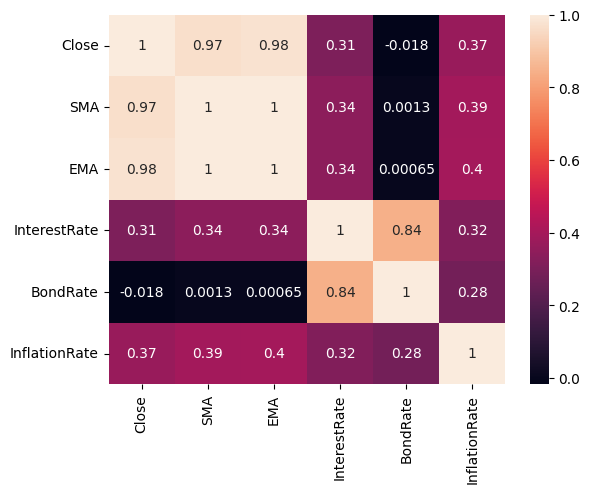

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Exclude non-numeric columns for correlation computation
numeric_dataset = dataset_knn_pd.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr = numeric_dataset.corr()

# Generate a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()


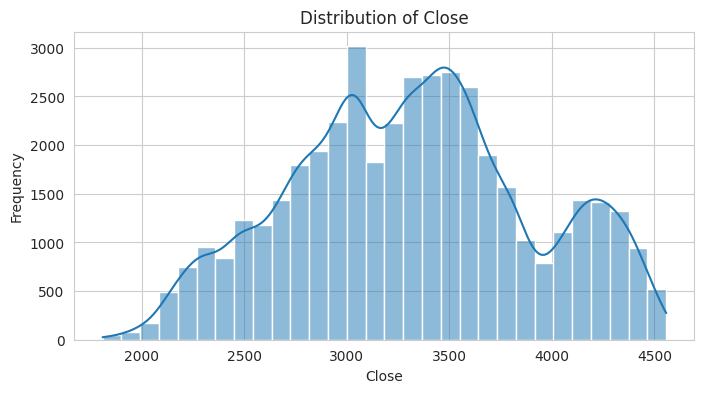

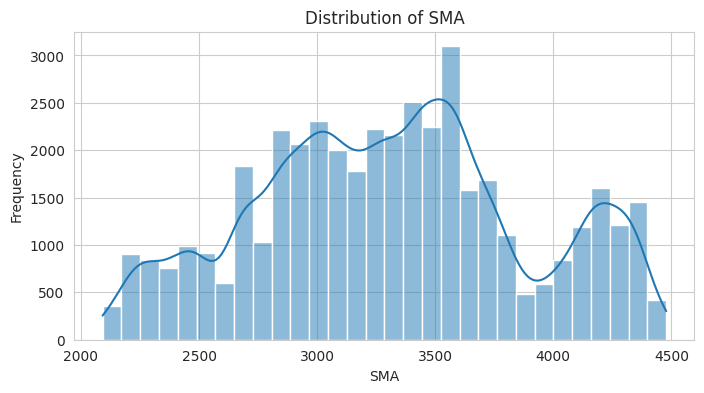

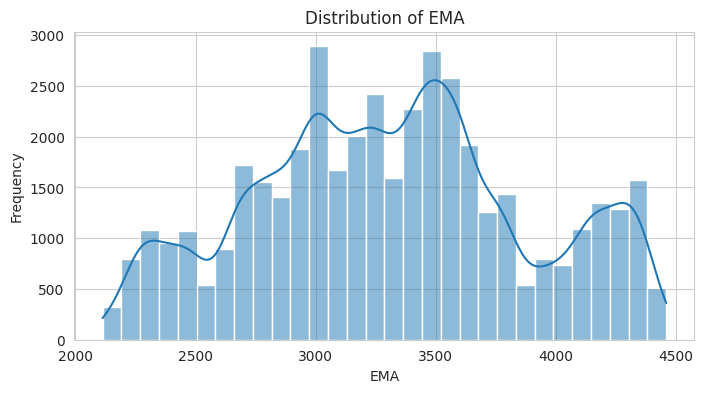

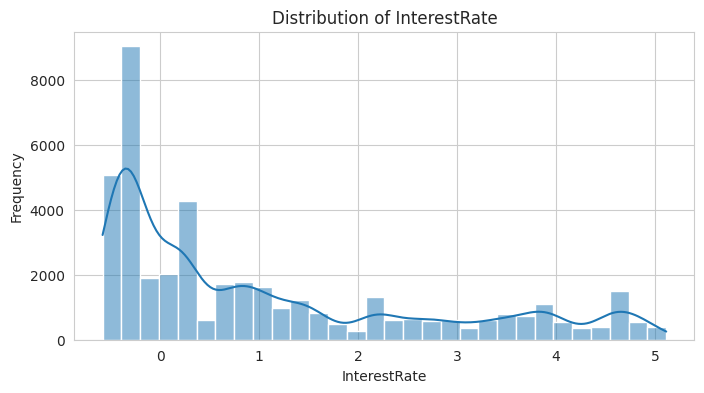

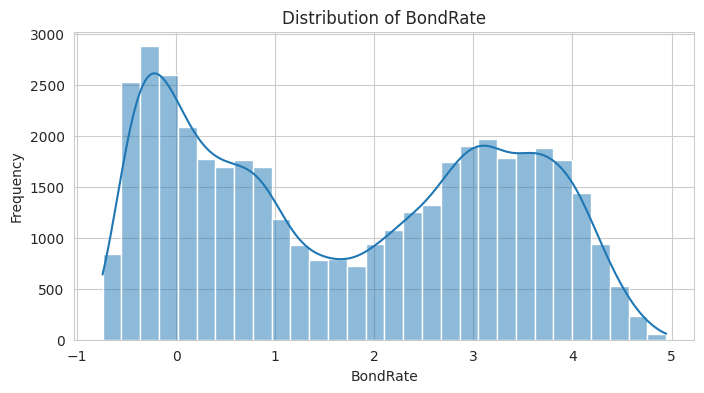

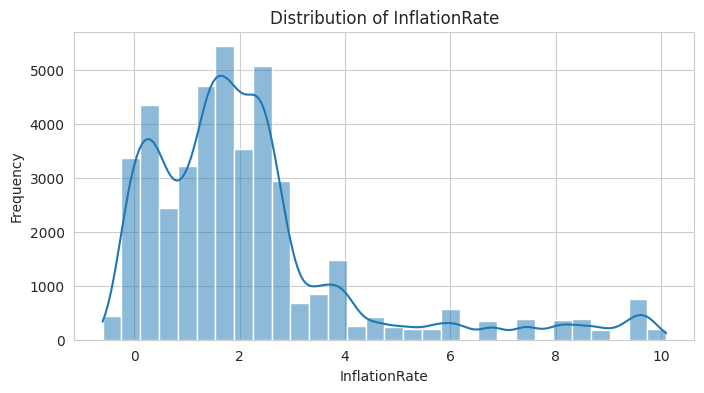

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of key metrics to analyze
metrics = ['Close', 'SMA', 'EMA', 'InterestRate', 'BondRate', 'InflationRate']

# Plotting the distribution for each metric
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset_knn_pd[metric], kde=True, bins=30)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()


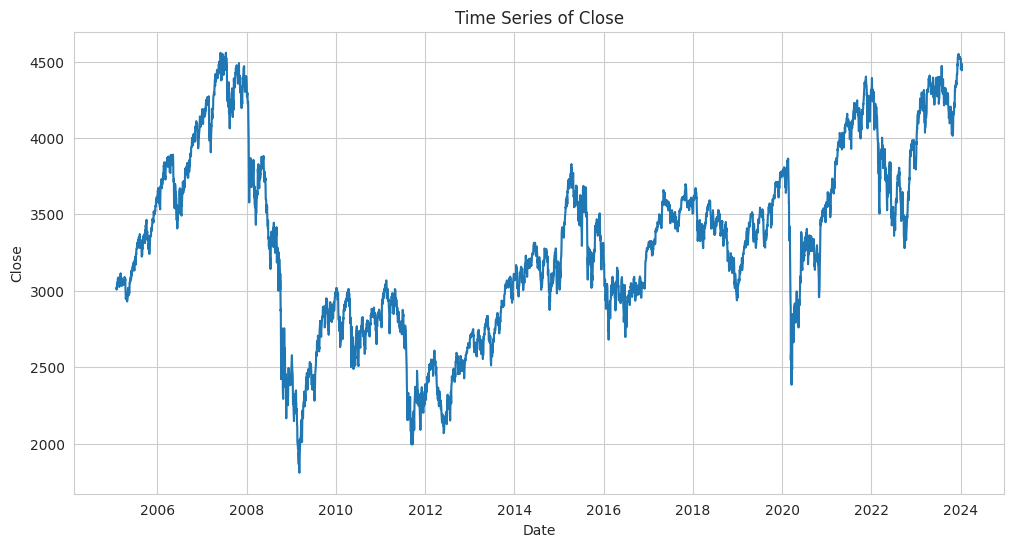

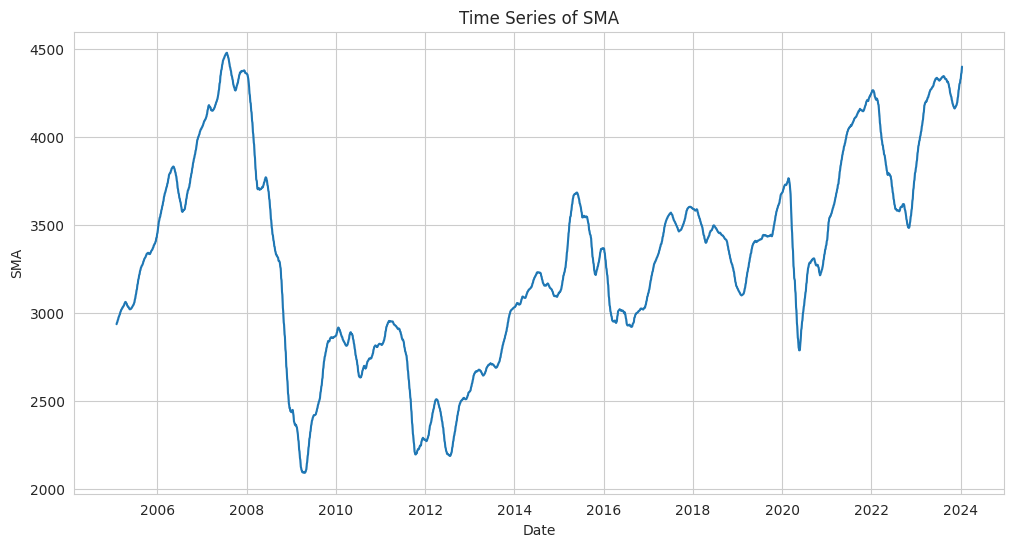

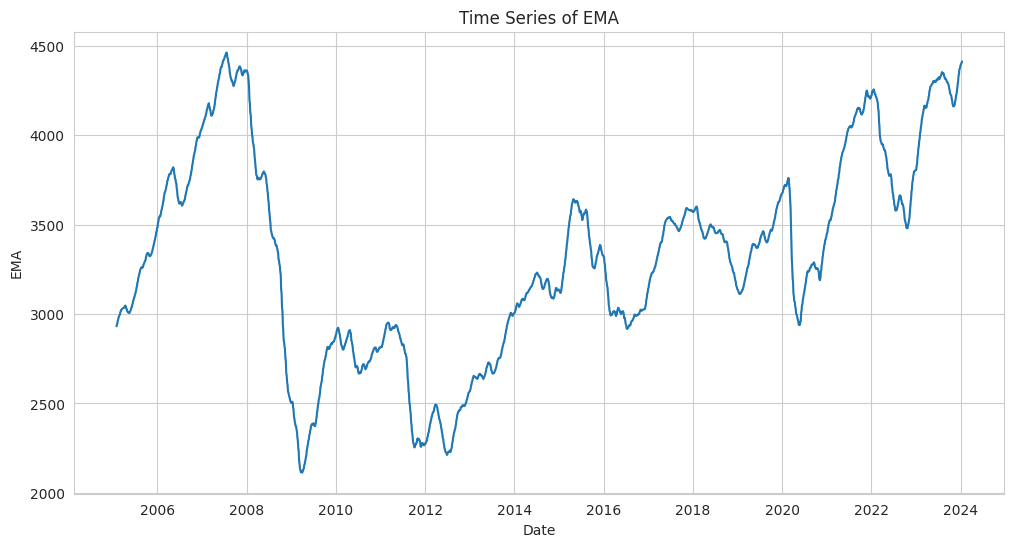

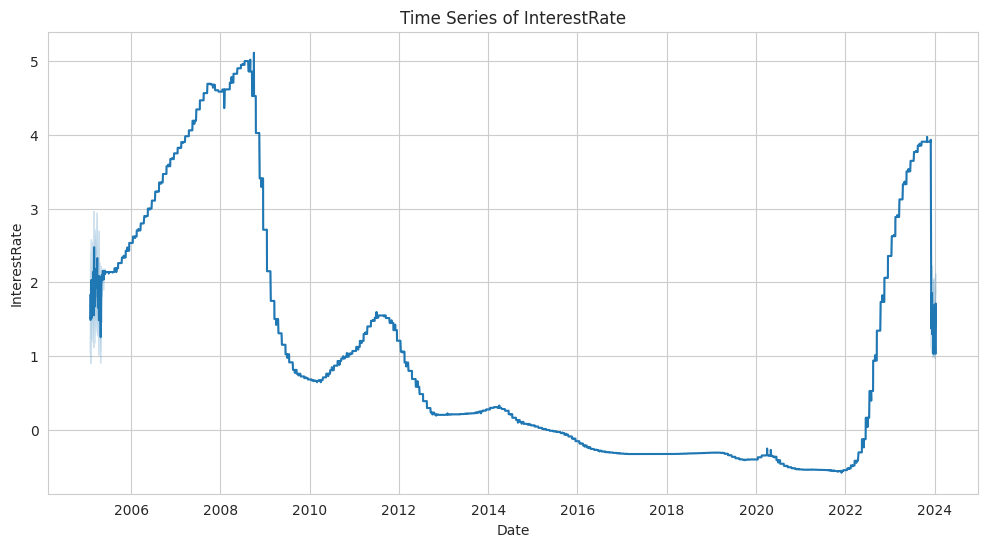

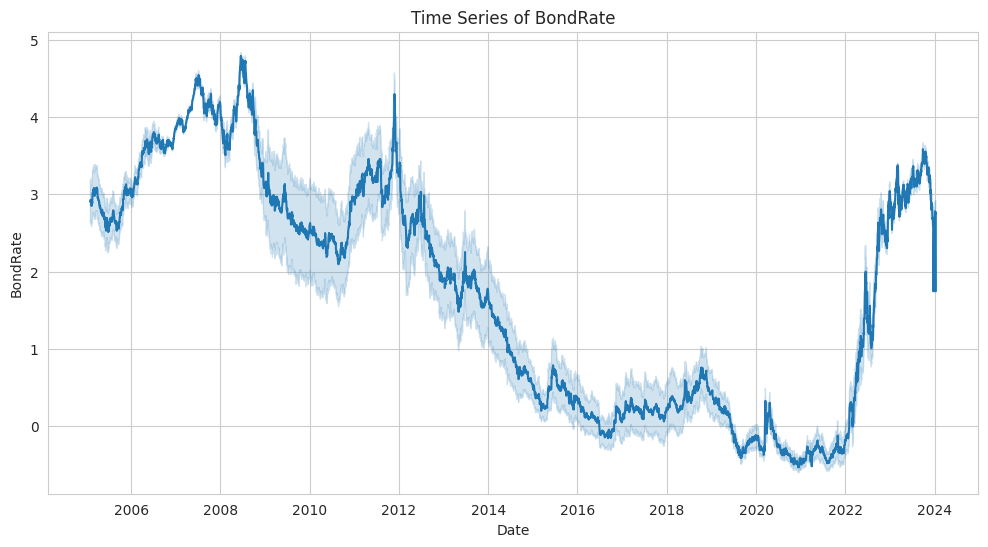

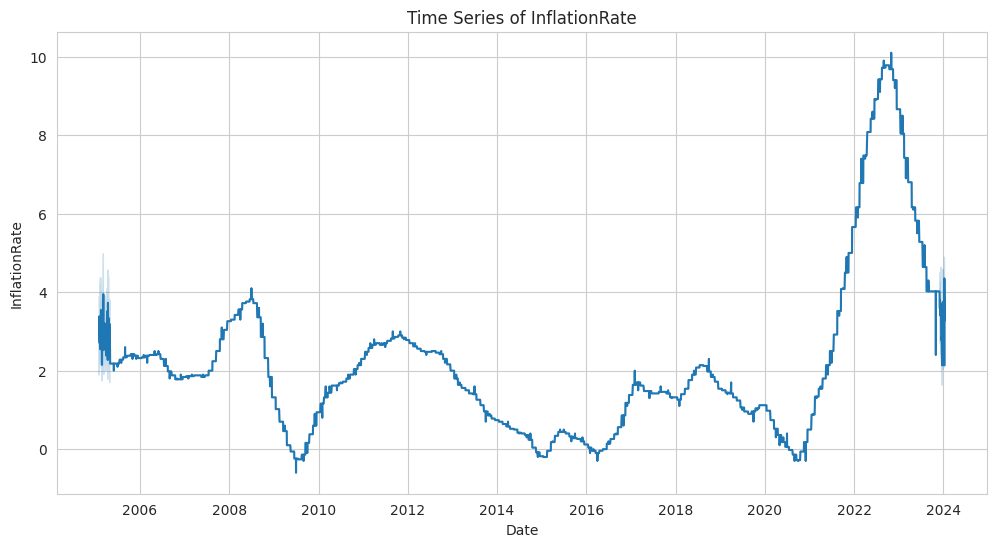

In [43]:
# Plotting time series for each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y=metric, data=dataset_knn_pd)
    plt.title(f'Time Series of {metric}')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.show()


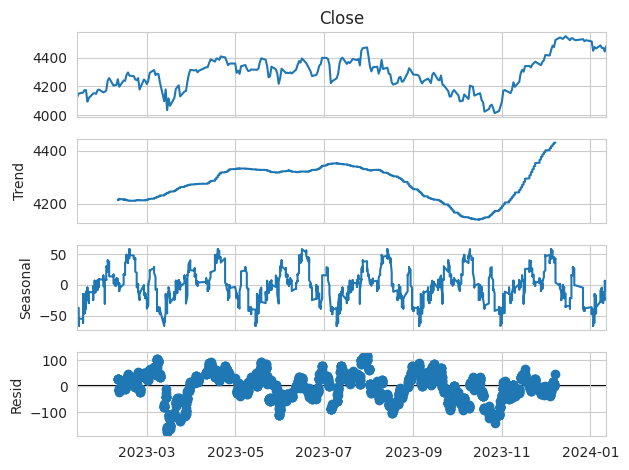

In [55]:
# Convert Spark DataFrame to Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Ensure the 'Date' column is in datetime format and set as the index
dataset_knn_pd['Date'] = pd.to_datetime(dataset_knn_pd['Date'])
dataset_knn_pd.set_index('Date', inplace=True)

# Filter for the most recent year
max_date = dataset_knn_pd.index.max()
one_year_ago = max_date - pd.DateOffset(years=1)
recent_year_data = dataset_knn_pd[dataset_knn_pd.index >= one_year_ago]

# Select the 'Close' column for analysis
close_series_recent = recent_year_data['Close']

# Perform seasonal decomposition
result = seasonal_decompose(close_series_recent, model='additive', period=365)

# Plot the decomposed components
result.plot()
plt.show()

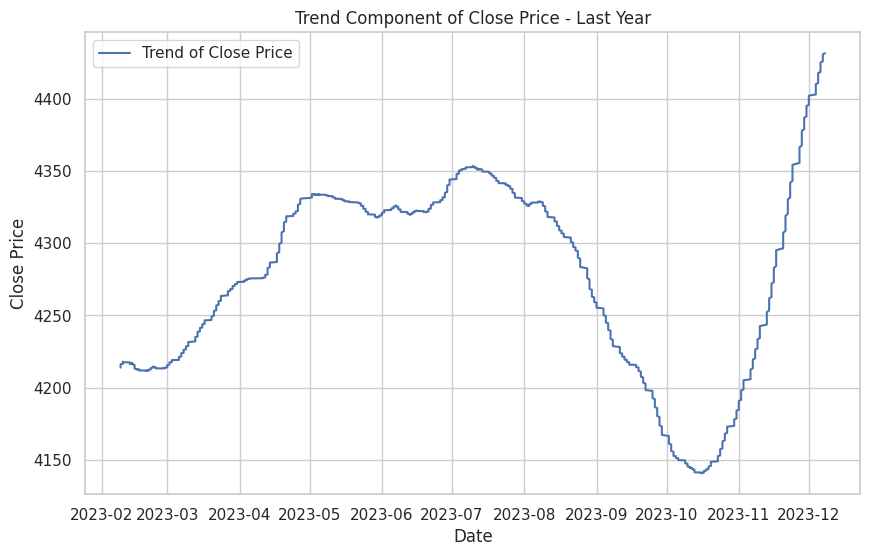

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert Spark DataFrame to Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Make sure the 'Date' column is in datetime format and set as the index
dataset_knn_pd['Date'] = pd.to_datetime(dataset_knn_pd['Date'])
dataset_knn_pd.set_index('Date', inplace=True)

# Filter for the most recent year
max_date = dataset_knn_pd.index.max()
one_year_ago = max_date - pd.DateOffset(years=1)
recent_year_data = dataset_knn_pd[dataset_knn_pd.index >= one_year_ago]

# Select the 'Close' column
close_series_recent = recent_year_data['Close']

# Decompose to extract the trend component
decomposition = seasonal_decompose(close_series_recent, model='additive', period=365)
trend = decomposition.trend

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(trend, label='Trend of Close Price')
plt.title('Trend Component of Close Price - Last Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

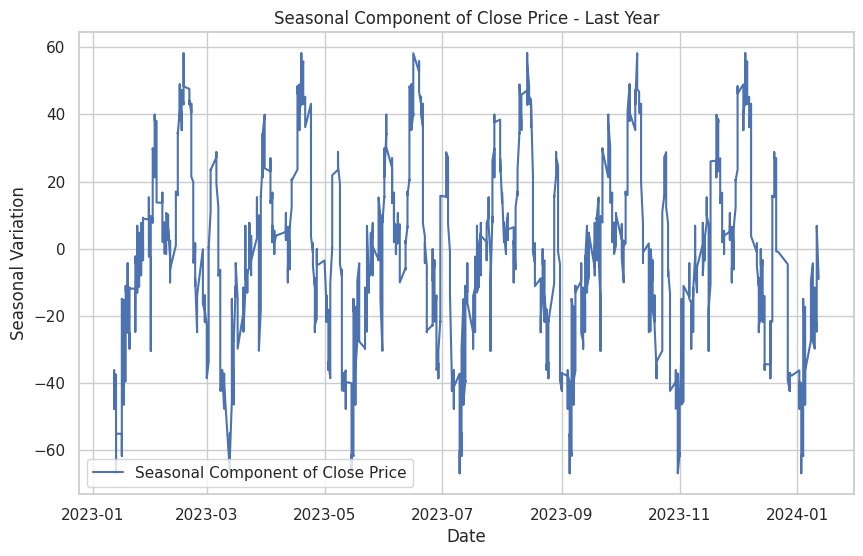

In [65]:
# Plotting the seasonal component
seasonal_component = decomposition.seasonal

plt.figure(figsize=(10, 6))
plt.plot(seasonal_component, label='Seasonal Component of Close Price')
plt.title('Seasonal Component of Close Price - Last Year')
plt.xlabel('Date')
plt.ylabel('Seasonal Variation')
plt.legend()
plt.show()

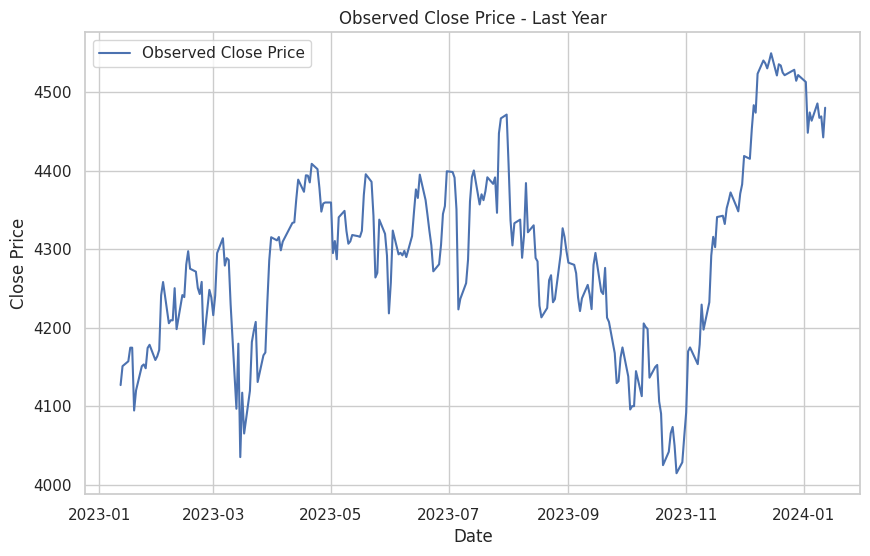

In [66]:
# Plotting the observed data
observed_component = decomposition.observed

plt.figure(figsize=(10, 6))
plt.plot(observed_component, label='Observed Close Price')
plt.title('Observed Close Price - Last Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

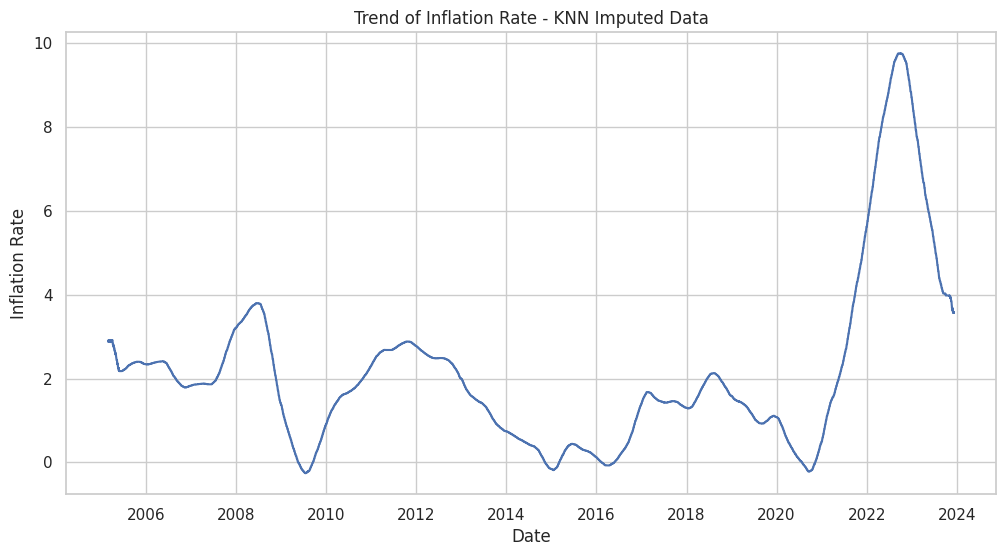

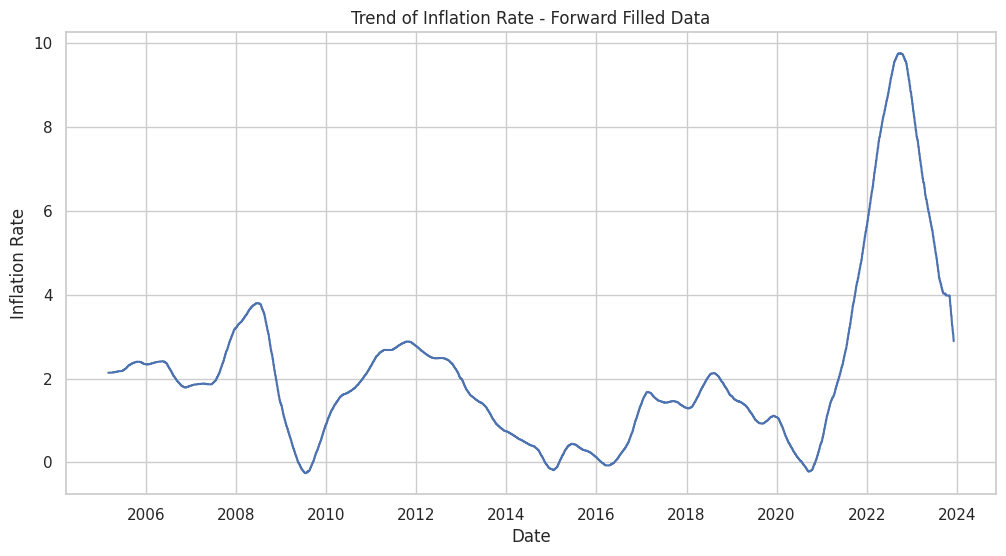

In [70]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Function to create a trend plot for Inflation Rate
def create_trend_plot(dataframe, title):
    # Ensure 'Date' is the index and is in datetime format
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe.set_index('Date', inplace=True)

    # Decompose to extract the trend component
    result = seasonal_decompose(dataframe['InflationRate'], model='additive', period=365)
    
    # Plotting the trend component
    plt.figure(figsize=(12, 6))
    plt.plot(result.trend)
    plt.title(f'Trend of Inflation Rate - {title}')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.show()

# Convert Spark DataFrame to Pandas DataFrame if not already done
dataset_knn_pd = dataset_knn.toPandas()
dataset_ff_pd = dataset_ff.toPandas()

# Create trend plots
create_trend_plot(dataset_knn_pd, "KNN Imputed Data")
create_trend_plot(dataset_ff_pd, "Forward Filled Data")

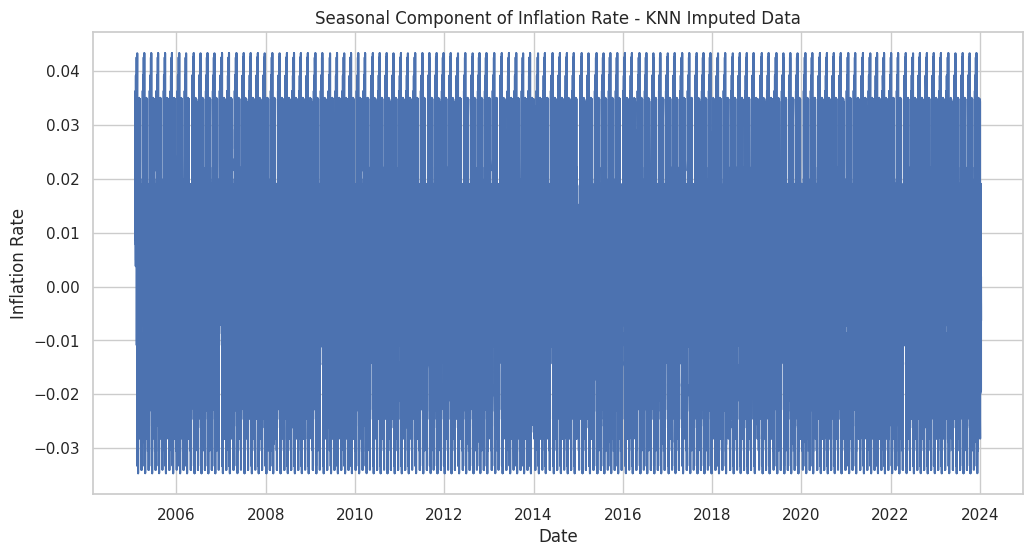

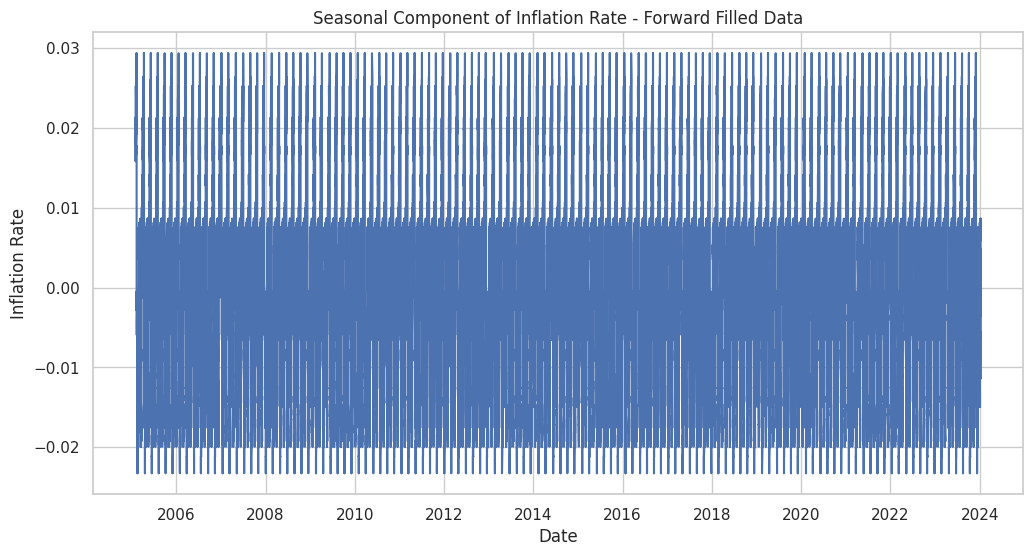

In [74]:
def create_seasonal_plot(dataframe, title):
    # Check if 'Date' column exists, and if so, convert it to datetime and set as index
    if 'Date' in dataframe.columns:
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        dataframe.set_index('Date', inplace=True)

    # Decompose to extract the seasonal component
    result = seasonal_decompose(dataframe['InflationRate'], model='additive', period=365)
    
    # Plotting the seasonal component
    plt.figure(figsize=(12, 6))
    plt.plot(result.seasonal)
    plt.title(f'Seasonal Component of Inflation Rate - {title}')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.show()

# Create seasonal plots
create_seasonal_plot(dataset_knn_pd, "KNN Imputed Data")
create_seasonal_plot(dataset_ff_pd, "Forward Filled Data")

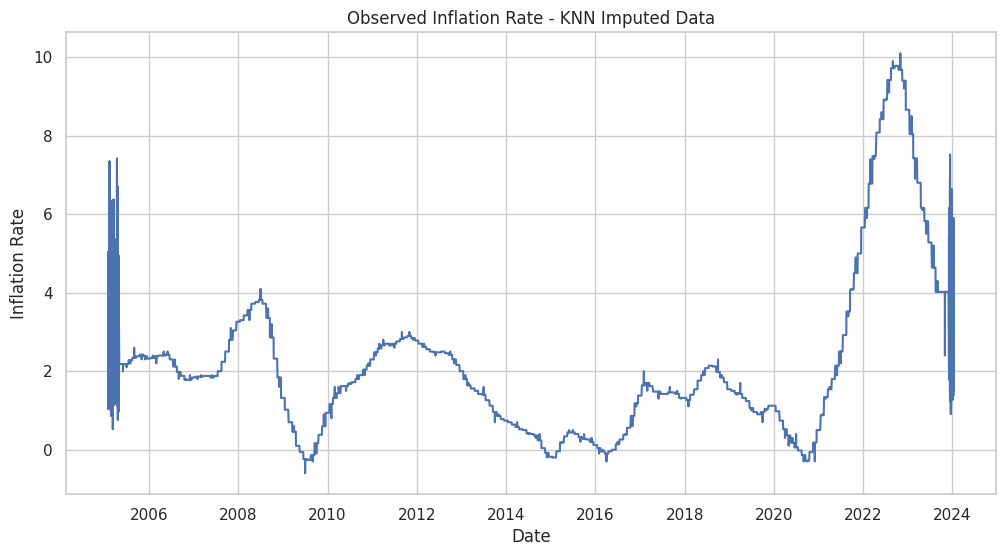

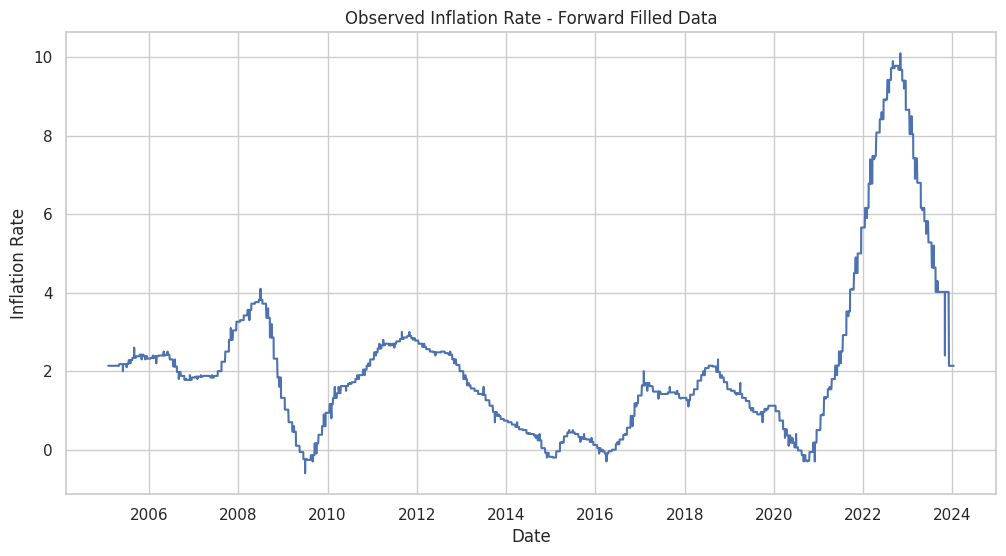

In [75]:
def create_observed_plot(dataframe, title):
    # Check if 'Date' column exists, and if so, convert it to datetime and set as index
    if 'Date' in dataframe.columns:
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        dataframe.set_index('Date', inplace=True)

    # Decompose to extract the observed component
    result = seasonal_decompose(dataframe['InflationRate'], model='additive', period=365)
    
    # Plotting the observed component
    plt.figure(figsize=(12, 6))
    plt.plot(result.observed)
    plt.title(f'Observed Inflation Rate - {title}')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.show()

# Create observed plots
create_observed_plot(dataset_knn_pd, "KNN Imputed Data")
create_observed_plot(dataset_ff_pd, "Forward Filled Data")


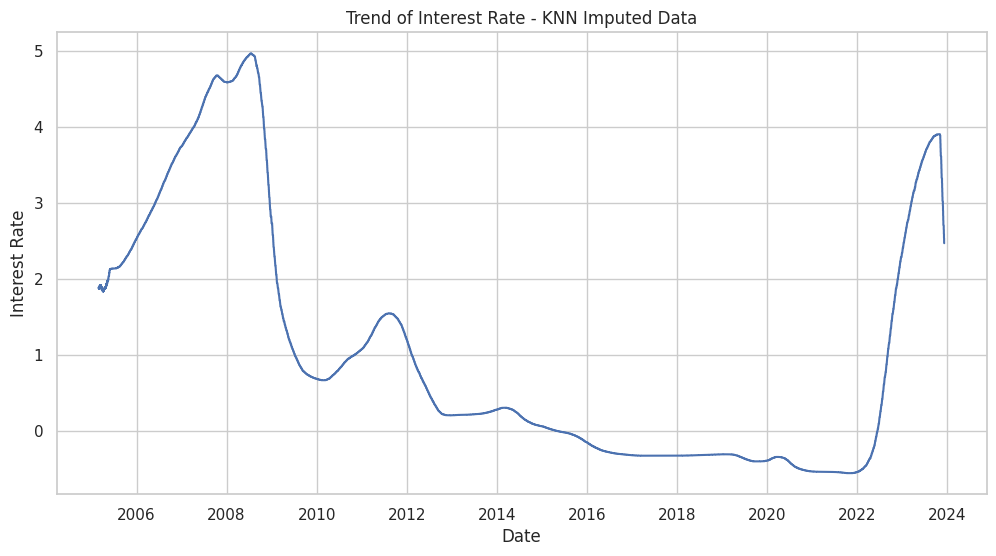

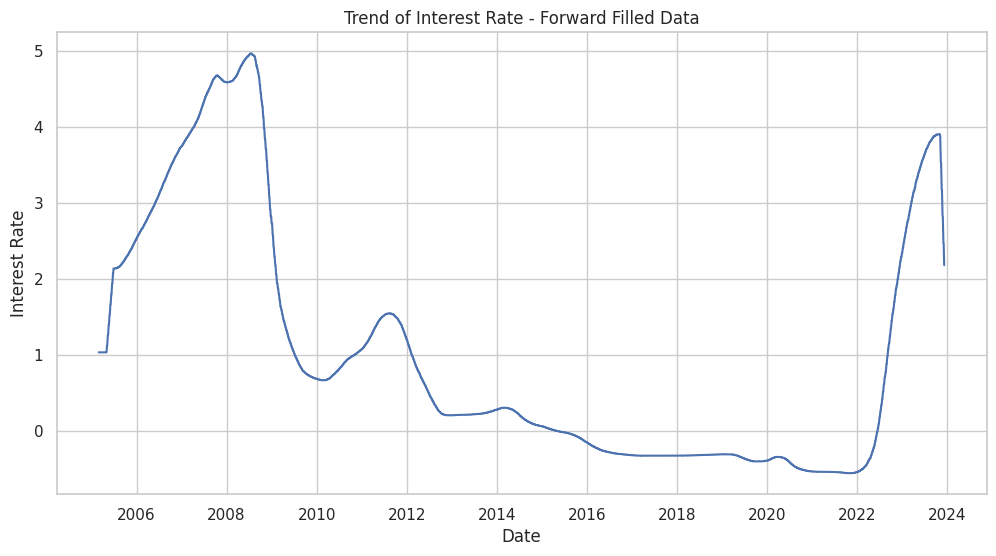

In [76]:
def create_trend_plot_interest(dataframe, title):
    if 'Date' in dataframe.columns:
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        dataframe.set_index('Date', inplace=True)

    result = seasonal_decompose(dataframe['InterestRate'], model='additive', period=365)
    plt.figure(figsize=(12, 6))
    plt.plot(result.trend)
    plt.title(f'Trend of Interest Rate - {title}')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    plt.show()

create_trend_plot_interest(dataset_knn_pd, "KNN Imputed Data")
create_trend_plot_interest(dataset_ff_pd, "Forward Filled Data")

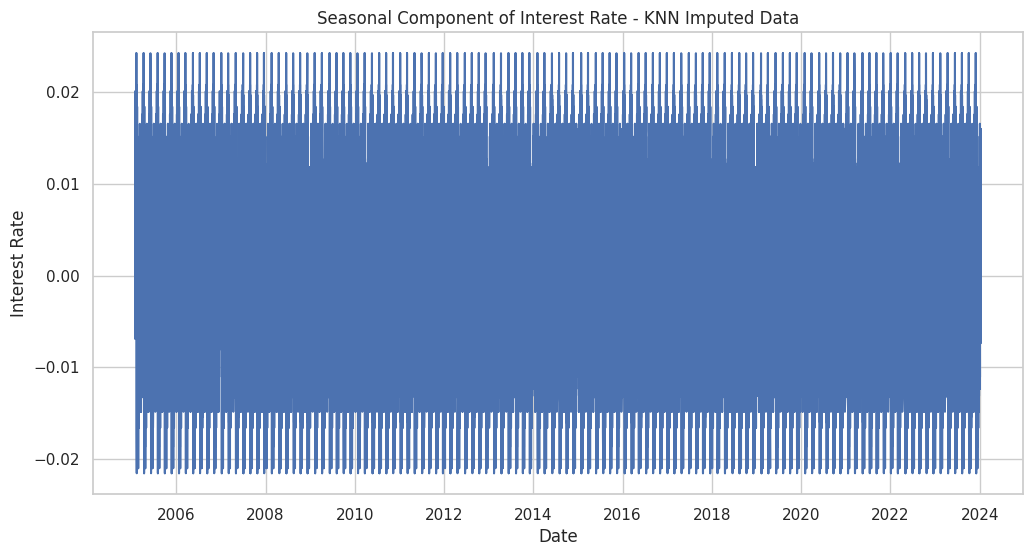

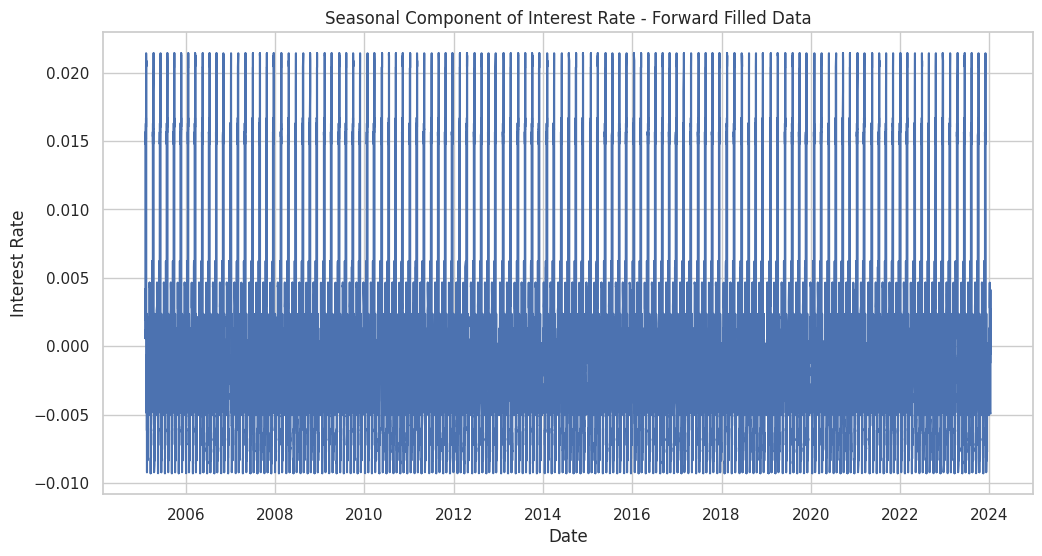

In [80]:
def create_seasonal_plot_interest(dataframe, title):
    if 'Date' in dataframe.columns:
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        dataframe.set_index('Date', inplace=True)

    result = seasonal_decompose(dataframe['InterestRate'], model='additive', period=365)
    plt.figure(figsize=(12, 6))
    plt.plot(result.seasonal)
    plt.title(f'Seasonal Component of Interest Rate - {title}')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    plt.show()

create_seasonal_plot_interest(dataset_knn_pd, "KNN Imputed Data")
create_seasonal_plot_interest(dataset_ff_pd, "Forward Filled Data")


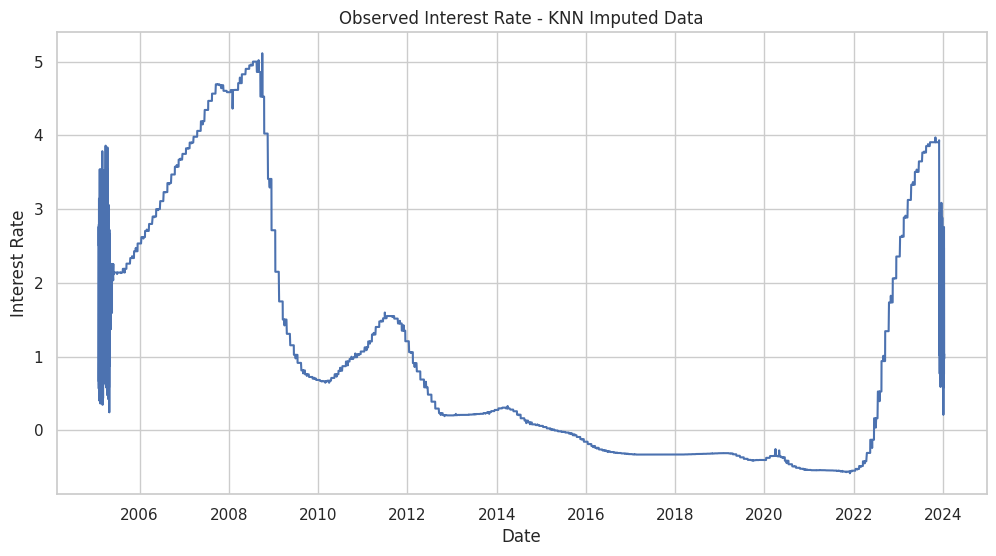

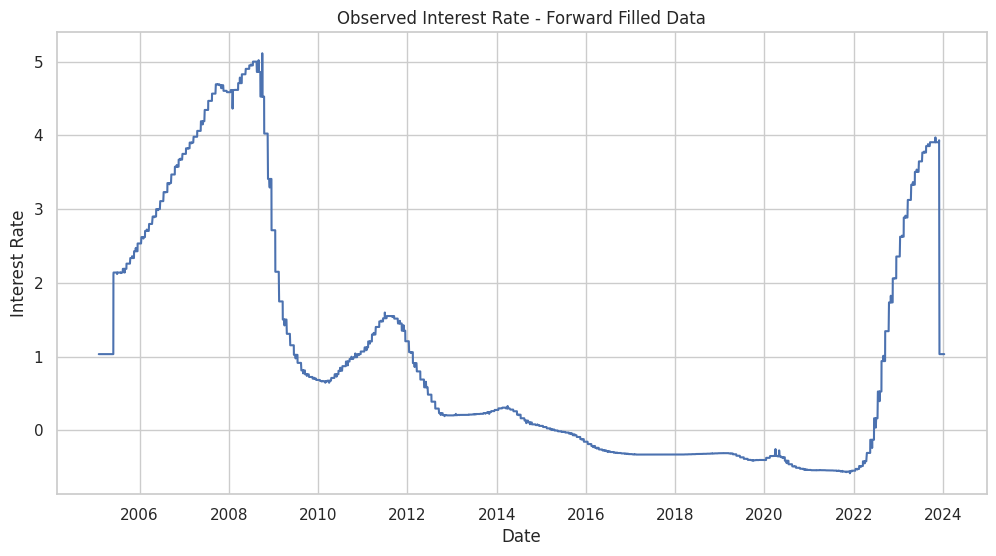

In [79]:
def create_observed_plot_interest(dataframe, title):
    if 'Date' in dataframe.columns:
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        dataframe.set_index('Date', inplace=True)

    result = seasonal_decompose(dataframe['InterestRate'], model='additive', period=365)
    plt.figure(figsize=(12, 6))
    plt.plot(result.observed)
    plt.title(f'Observed Interest Rate - {title}')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate')
    plt.show()

create_observed_plot_interest(dataset_knn_pd, "KNN Imputed Data")
create_observed_plot_interest(dataset_ff_pd, "Forward Filled Data")


# Model: ARIMA & LSTM

/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                42991
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -285148.629
Date:                Sun, 14 Jan 2024   AIC                         570303.259
Time:                        19:08:33   BIC                         570329.265
Sample:                             0   HQIC                        570311.462
                              - 42991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -5.311e-14   6277.828  -8.46e-18      1.000   -1.23e+04    1.23e+04
ma.L1         -0.0016   6277.828  -2.53e-07      1.000   -1.23e+04    1.23e+04
sigma2      3.379e+04     49.565    681.808      0.0

/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


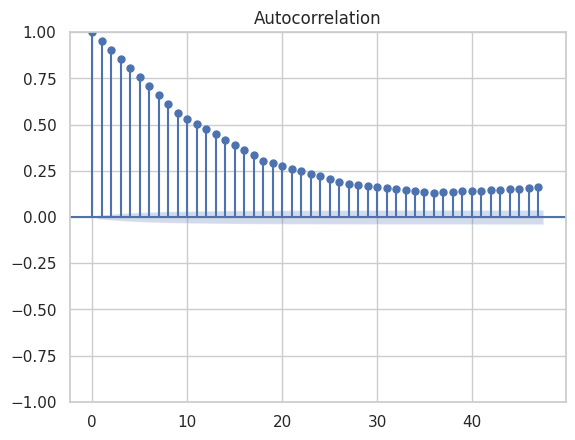

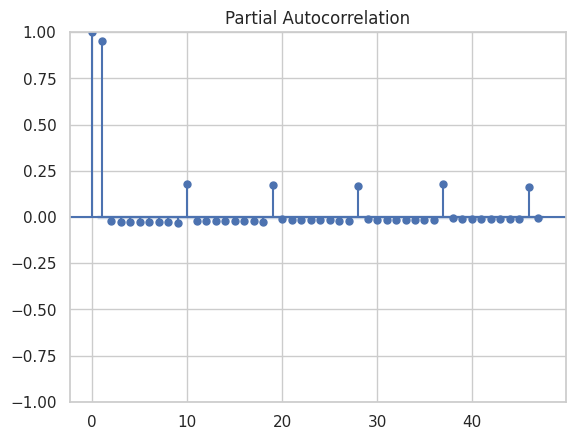

In [83]:
from pyspark.sql import SparkSession
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

# Assuming you have a Spark session and your DataFrame 'dataset'
# spark = SparkSession.builder.appName("YourAppName").getOrCreate()

# Convert Spark DataFrame to Pandas DataFrame
dataset_pd = dataset.toPandas()

# Convert 'Date' column to datetime and set it as index
dataset_pd['Date'] = pd.to_datetime(dataset_pd['Date'])
dataset_pd.set_index('Date', inplace=True)

# Select the series for modeling, e.g., 'Close' price
series = dataset_pd['Close']

# Plot ACF and PACF for parameter identification
plot_acf(series)
plot_pacf(series)

# Define and fit the ARIMA model (example parameters)
model = ARIMA(series, order=(1,1,1))
results = model.fit()

# Summarize model results
print(results.summary())

# Make predictions
predictions = results.forecast(steps=5)

# Evaluate the model
# [Your code for evaluation]


In [89]:
from statsmodels.tsa.stattools import adfuller

# Test for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

test_stationarity(series)

# Define and fit the ARIMA model based on your ACF and PACF analysis
p = 1  
d = 0  
q = 1  

model = ARIMA(series, order=(p, d, q))
results = model.fit()

# Summarize model results
print(results.summary())

ADF Statistic: -16.171743
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                42991
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -284614.397
Date:                Sun, 14 Jan 2024   AIC                         569236.793
Time:                        20:04:30   BIC                         569271.468
Sample:                             0   HQIC                        569247.732
                              - 42991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3317.9683     18.494    179.409      0.000    3281.721    3354.216
ar.L1          0.9489      0.002    439.482      0.000       0.945       0.953
ma.L1          0.0235      0.015      1.538      0.1

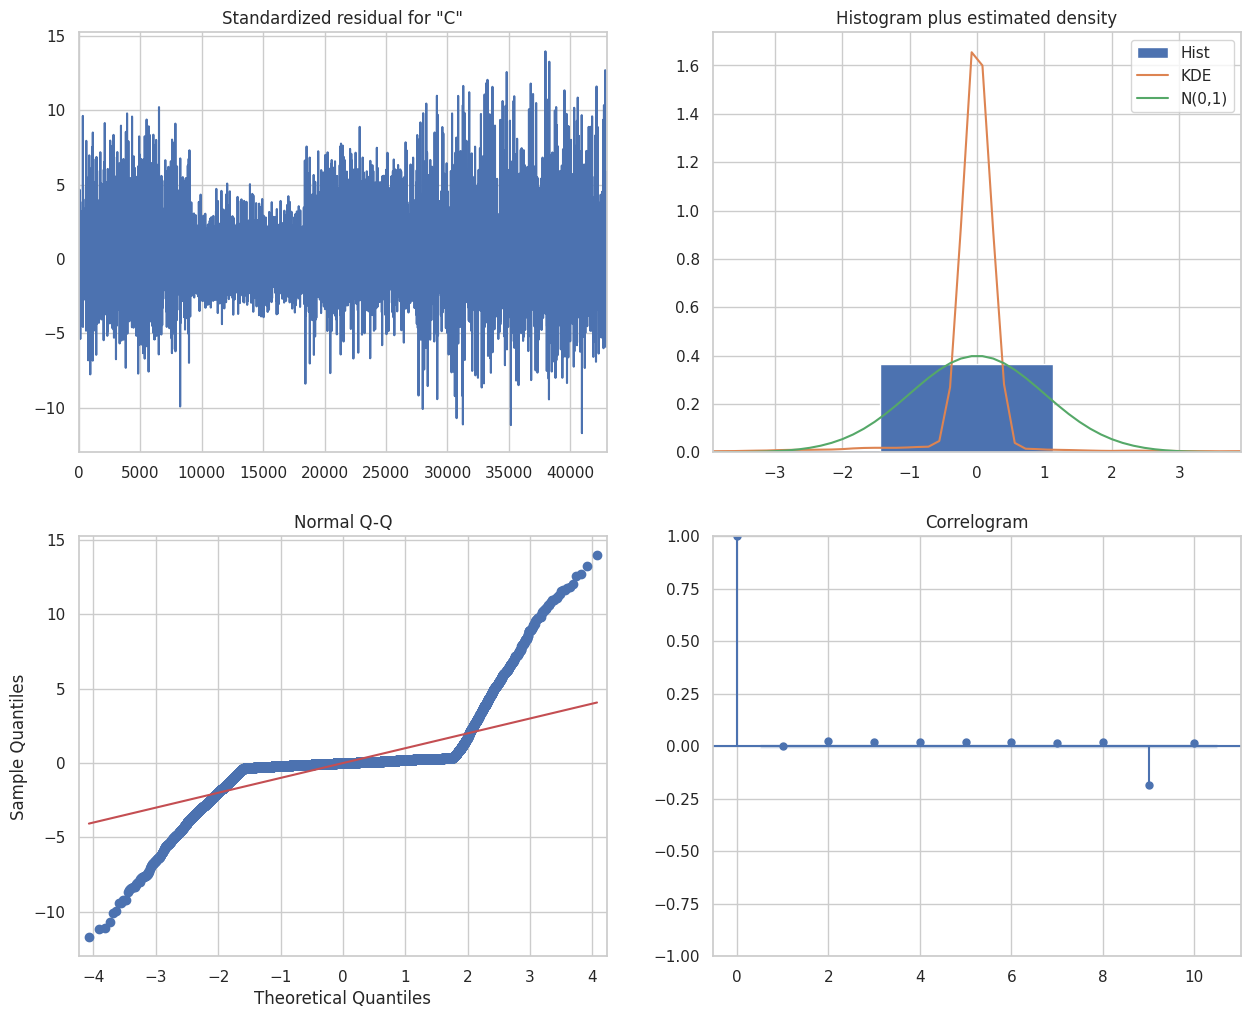

/home/fabiopoli/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

In [90]:
# Diagnostics plots
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecasting
forecast_steps = 5  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(series.index[-1], periods=forecast_steps + 1, closed='right')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the forecast alongside the series
plt.figure(figsize=(12, 6))
plt.plot(series, label='Observed')
plt.plot(forecast_series, label='Forecast', color='r')
plt.legend()
plt.show()

# For model evaluation, you would compare these forecasts to actual observed values (if available)
